In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

from nltk.tokenize import RegexpTokenizer # tokenizer
from nltk.corpus import stopwords # remove stopwords
nltk.download('stopwords')
from nltk.util import ngrams
#visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('prepDS.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   datePosted                     912 non-null    object
 1   description                    912 non-null    object
 2   employmentType                 912 non-null    object
 3   experienceRequirements         912 non-null    object
 4   hiringOrganization             912 non-null    object
 5   identifier                     912 non-null    object
 6   industry                       911 non-null    object
 7   jobLocation                    912 non-null    object
 8   skills                         5 non-null      object
 9   title                          912 non-null    object
 10  validThrough                   912 non-null    object
 11  jobLocationType                122 non-null    object
 12  applicantLocationRequirements  122 non-null    object
 13  estim

,datePosted,description,employmentType,experienceRequirements,hiringOrganization,identifier,industry,jobLocation,skills,title,validThrough,jobLocationType,applicantLocationRequirements,estimatedSalary,baseSalary,desc_html,desc
0,2021-03-23T16:03:21.000Z,Genuent is hiring a Data Scientist/Data Engine...,FULL_TIME,Mid-Senior level,"{'@type': 'Organization', 'name': 'Genuent', '...","{'@type': 'PropertyValue', 'name': 'Genuent', ...",Staffing and Recruiting,"{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist - REMOTE,2021-04-22T16:03:20.000Z,NaN,NaN,NaN,NaN,<p>Genuent is hiring a Data Scientist/Data Eng...,responsibilities build long term causal estima...
1,2021-03-23T17:02:32.000Z,Ayata is developing its Prescriptive Analytics...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Ayata', 'sa...","{'@type': 'PropertyValue', 'name': 'Ayata', 'v...","Information Technology and Services,Computer S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,ML/AI/NLP Data Scientist,2021-04-22T17:02:32.000Z,NaN,NaN,NaN,NaN,Ayata is developing its Prescriptive Analytics...,responsibilities and duties ayata is looking f...
2,2021-03-23T14:35:46.000Z,"Our team, part of the Customer Success Enginee...",FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Microsoft',...","{'@type': 'PropertyValue', 'name': 'Microsoft'...","Computer Hardware,Computer Software,Informatio...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data & Applied Scientist,2021-04-22T14:35:45.000Z,NaN,NaN,NaN,NaN,"Our team, part of the Customer Success Enginee...",responsibilities responsibilities being one of...
3,2021-03-22T20:24:23.000Z,Headspace is looking for a Data Scientist to h...,FULL_TIME,Entry level,"{'@type': 'Organization', 'name': 'Headspace I...","{'@type': 'PropertyValue', 'name': 'Headspace ...","Marketing and Advertising,Computer Software,In...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist (Remote),2021-04-21T20:24:22.000Z,TELECOMMUTE,"{'@type': 'Country', 'name': 'United States'}",NaN,NaN,<em>Headspace is looking for a Data Scientist ...,successful candidate should love complex busin...
4,2021-03-23T09:07:02.000Z,DescriptionThe AWS Applications team builds po...,FULL_TIME,Not Applicable,"{'@type': 'Organization', 'name': 'Amazon Web ...","{'@type': 'PropertyValue', 'name': 'Amazon Web...","Computer Software,Information Technology and S...","{'@type': 'Place', 'address': {'@type': 'Posta...",NaN,Data Scientist,2021-04-22T09:07:01.000Z,NaN,NaN,"{'@type': 'MonetaryAmount', 'currency': 'USD',...",NaN,<strong><u>Description<br><br></u></strong>The...,what you will do here we are looking for a sea...


In [4]:
df['desc'][0]

'responsibilities build long term causal estimation models using a combination of econometrics machine learning and predictive statistics to drive thought leadership around real estate merchandizing pricing and marketing among others partner with our data engineering team to guide and build the data infrastructure needed to begin applying supervised and unsupervised modeling techniques to generate predictions and uncover patterns develop hypothesis statements and apply statistical testing to determine causality and generalize observations model assessment validation identify the model evaluation metrics and apply best practice techniques for model testing and tuning to assess accuracy fit validity and robustness for multi stage models and model ensembles model deployment scaling support efforts to ensure that analytical models and techniques used can be deployed into production support evaluation of the analytical model and the scalability and sustainability of analytical models code d

## Tokenizer

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
#test
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

In [6]:
# word tokenize
requirements = df.desc.apply(tokenizer.tokenize)
requirements

0      [responsibilities, build, long, term, causal, ...
1      [responsibilities, and, duties, ayata, is, loo...
2      [responsibilities, responsibilities, being, on...
3      [successful, candidate, should, love, complex,...
4      [what, you, will, do, here, we, are, looking, ...
                             ...                        
907    [ideal, candidate, is, good, at, prioritizing,...
908    [responsibilities, of, this, position, include...
909    [ideal, candidate, will, have, solid, hands, o...
910    [about, your, interest, in, joining, our, grow...
911    [what, you, will, be, doing, solve, business, ...
Name: desc, Length: 912, dtype: object

## Remove stopwords

In [7]:
all_stopwords = stopwords.words('english')
all_stopwords[:2]

['i', 'me']

In [8]:
requirements = requirements.apply(lambda text: [w for w in text if w not in all_stopwords])
requirements

0      [responsibilities, build, long, term, causal, ...
1      [responsibilities, duties, ayata, looking, ai,...
2      [responsibilities, responsibilities, one, stew...
3      [successful, candidate, love, complex, busines...
4      [looking, seasoned, data, scientist, expertise...
                             ...                        
907    [ideal, candidate, good, prioritizing, managin...
908    [responsibilities, position, include, collabor...
909    [ideal, candidate, solid, hands, experience, a...
910    [interest, joining, growing, team, key, statis...
911    [solve, business, problems, developing, framew...
Name: desc, Length: 912, dtype: object

In [9]:
# Stemming
porter = nltk.PorterStemmer()
print(requirements[0][:20])
print([porter.stem(t) for t in requirements[0][:20]])
wnl = nltk.WordNetLemmatizer()
print([wnl.lemmatize(t) for t in requirements[0][:20]])

['responsibilities', 'build', 'long', 'term', 'causal', 'estimation', 'models', 'using', 'combination', 'econometrics', 'machine', 'learning', 'predictive', 'statistics', 'drive', 'thought', 'leadership', 'around', 'real', 'estate']
['respons', 'build', 'long', 'term', 'causal', 'estim', 'model', 'use', 'combin', 'econometr', 'machin', 'learn', 'predict', 'statist', 'drive', 'thought', 'leadership', 'around', 'real', 'estat']
['responsibility', 'build', 'long', 'term', 'causal', 'estimation', 'model', 'using', 'combination', 'econometrics', 'machine', 'learning', 'predictive', 'statistic', 'drive', 'thought', 'leadership', 'around', 'real', 'estate']


In [10]:
requirements = requirements.apply(lambda text: [wnl.lemmatize(t) for t in text])
requirements[0]

['responsibility',
 'build',
 'long',
 'term',
 'causal',
 'estimation',
 'model',
 'using',
 'combination',
 'econometrics',
 'machine',
 'learning',
 'predictive',
 'statistic',
 'drive',
 'thought',
 'leadership',
 'around',
 'real',
 'estate',
 'merchandizing',
 'pricing',
 'marketing',
 'among',
 'others',
 'partner',
 'data',
 'engineering',
 'team',
 'guide',
 'build',
 'data',
 'infrastructure',
 'needed',
 'begin',
 'applying',
 'supervised',
 'unsupervised',
 'modeling',
 'technique',
 'generate',
 'prediction',
 'uncover',
 'pattern',
 'develop',
 'hypothesis',
 'statement',
 'apply',
 'statistical',
 'testing',
 'determine',
 'causality',
 'generalize',
 'observation',
 'model',
 'assessment',
 'validation',
 'identify',
 'model',
 'evaluation',
 'metric',
 'apply',
 'best',
 'practice',
 'technique',
 'model',
 'testing',
 'tuning',
 'ass',
 'accuracy',
 'fit',
 'validity',
 'robustness',
 'multi',
 'stage',
 'model',
 'model',
 'ensemble',
 'model',
 'deployment',
 'scali

# N-grams

In [11]:
from collections import Counter

In [12]:
print(len(requirements[0]))
len(requirements.sum())

274


243974

In [13]:
#Create your bigrams
#ugs = nltk.unigrams(df.job_description.sum())

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(requirements.sum())
fdist

FreqDist({'data': 6640, 'experience': 4396, 'business': 1991, 'work': 1887, 'team': 1851, 'learning': 1849, 'science': 1833, 'model': 1621, 'machine': 1403, 'analysis': 1392, ...})

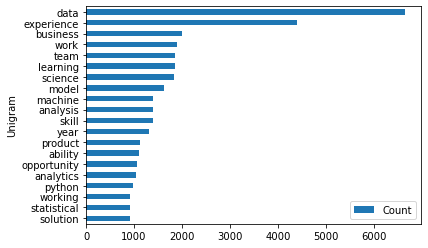

In [14]:
df_uni = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_uni = pd.DataFrame(df_uni,columns=['Unigram','Count'])
df_uni[:20][::-1].plot.barh(x='Unigram',y='Count')
plt.show()

In [15]:
#Create your bigrams
bgs = nltk.bigrams(requirements.sum())

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)

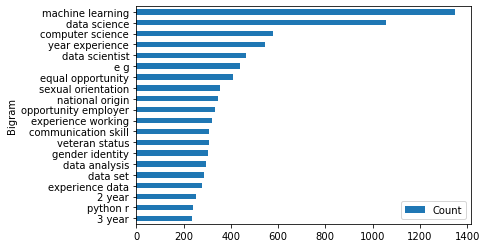

In [16]:
df_bg = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_bg = pd.DataFrame(df_bg,columns=['Bigram','Count'])
df_bg['Bigram'] = [" ".join(s) for s in df_bg['Bigram']]
df_bg[:20][::-1].plot.barh(x='Bigram',y='Count')
plt.show()

In [17]:
# trigram
tgs=ngrams(requirements.sum(),3)
fdist = nltk.FreqDist(tgs)
sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]

[(('equal', 'opportunity', 'employer'), 315),
 (('sexual', 'orientation', 'gender'), 193),
 (('race', 'color', 'religion'), 181),
 (('orientation', 'gender', 'identity'), 171),
 (('machine', 'learning', 'model'), 166),
 (('without', 'regard', 'race'), 154),
 (('2', 'year', 'experience'), 129),
 (('regard', 'race', 'color'), 129),
 (('employment', 'without', 'regard'), 128),
 (('equal', 'employment', 'opportunity'), 124),
 (('degree', 'computer', 'science'), 114),
 (('machine', 'learning', 'technique'), 114),
 (('large', 'data', 'set'), 114),
 (('protected', 'veteran', 'status'), 105),
 (('gender', 'identity', 'expression'), 104),
 (('machine', 'learning', 'algorithm'), 104),
 (('3', 'year', 'experience'), 103),
 (('receive', 'consideration', 'employment'), 102),
 (('consideration', 'employment', 'without'), 102),
 (('natural', 'language', 'processing'), 98),
 (('applicant', 'receive', 'consideration'), 97),
 (('qualified', 'applicant', 'receive'), 92),
 (('color', 'religion', 'sex'), 9

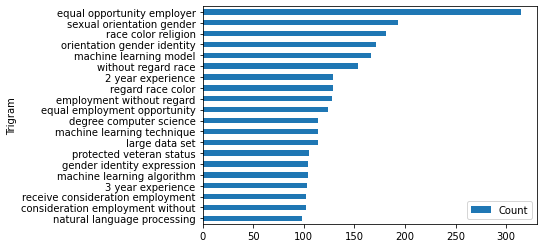

In [18]:
df_tg = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_tg = pd.DataFrame(df_tg,columns=['Trigram','Count'])
df_tg['Trigram'] = [" ".join(s) for s in df_tg['Trigram']]
df_tg[:20][::-1].plot.barh(x='Trigram',y='Count')
plt.show()

In [19]:
# quatergram
qgs=ngrams(requirements.sum(),4)
fdist = nltk.FreqDist(qgs)
sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]

[(('sexual', 'orientation', 'gender', 'identity'), 171),
 (('without', 'regard', 'race', 'color'), 129),
 (('regard', 'race', 'color', 'religion'), 119),
 (('receive', 'consideration', 'employment', 'without'), 102),
 (('consideration', 'employment', 'without', 'regard'), 102),
 (('employment', 'without', 'regard', 'race'), 100),
 (('applicant', 'receive', 'consideration', 'employment'), 94),
 (('qualified', 'applicant', 'receive', 'consideration'), 92),
 (('race', 'color', 'religion', 'sex'), 90),
 (('sex', 'sexual', 'orientation', 'gender'), 79),
 (('federal', 'state', 'local', 'law'), 68),
 (('employer', 'qualified', 'applicant', 'receive'), 64),
 (('religion', 'color', 'national', 'origin'), 57),
 (('opportunity', 'employer', 'qualified', 'applicant'), 56),
 (('written', 'verbal', 'communication', 'skill'), 56),
 (('race', 'religion', 'color', 'national'), 55),
 (('proud', 'equal', 'opportunity', 'employer'), 55),
 (('equal', 'opportunity', 'employer', 'qualified'), 54),
 (('orient

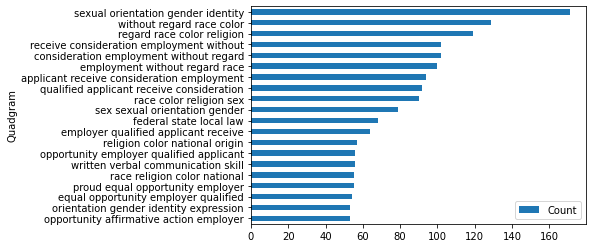

In [20]:
df_qg = sorted(fdist.items(), key=lambda item: item[1],reverse=True)[:100]
df_qg = pd.DataFrame(df_qg,columns=['Quadgram','Count'])
df_qg['Quadgram'] = [" ".join(s) for s in df_qg['Quadgram']]
df_qg[:20][::-1].plot.barh(x='Quadgram',y='Count')
plt.show()

## Visualization

(-0.5, 399.5, 199.5, -0.5)

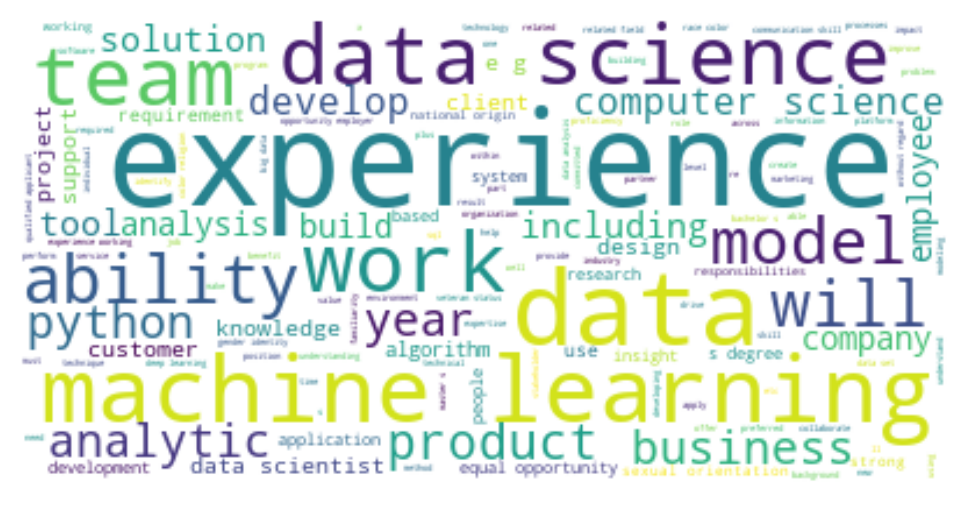

In [24]:
plt.figure(dpi=200)
wordcloud = WordCloud(background_color="white").generate(' '.join(df.desc))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [27]:
df.experienceRequirements.value_counts()

Entry level         442
Mid-Senior level    205
Not Applicable      153
Associate           105
Internship            5
Director              2
Name: experienceRequirements, dtype: int64

In [29]:
exp_req = df.experienceRequirements.value_counts().index[:4]
exp_req

Index(['Entry level', 'Mid-Senior level', 'Not Applicable', 'Associate'], dtype='object')

<Figure size 1200x800 with 0 Axes>

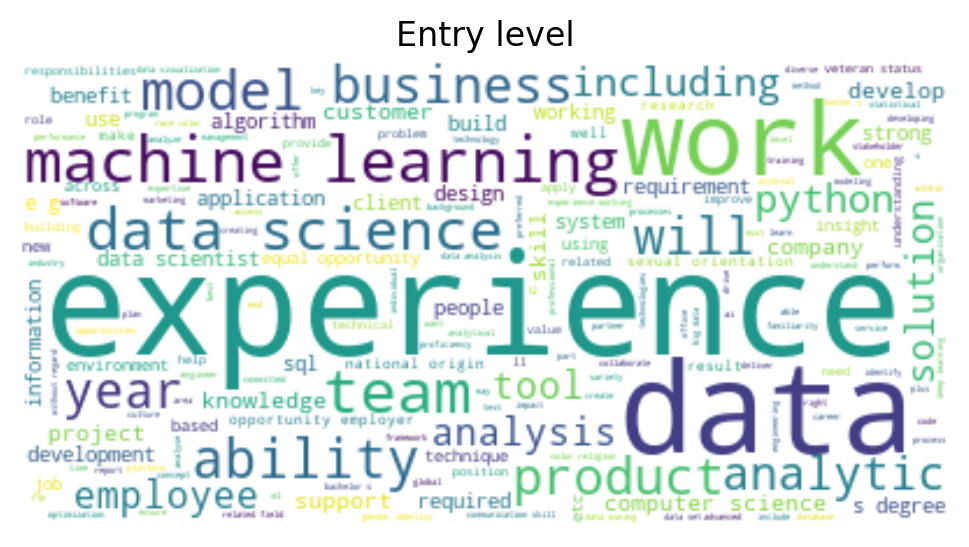

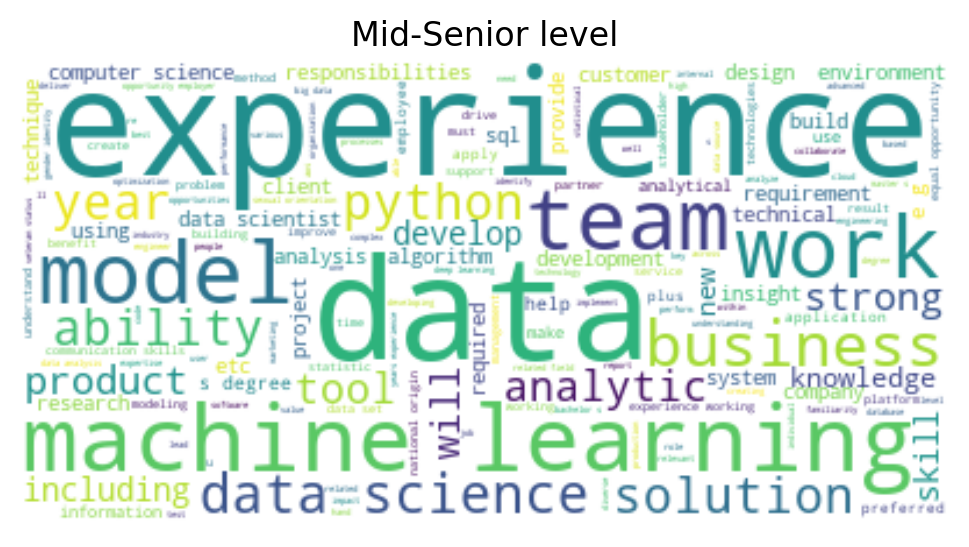

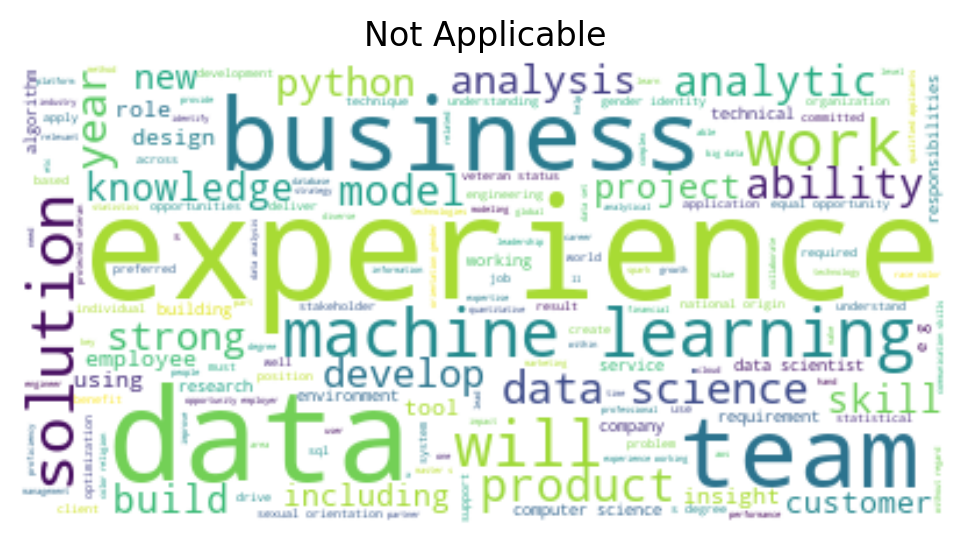

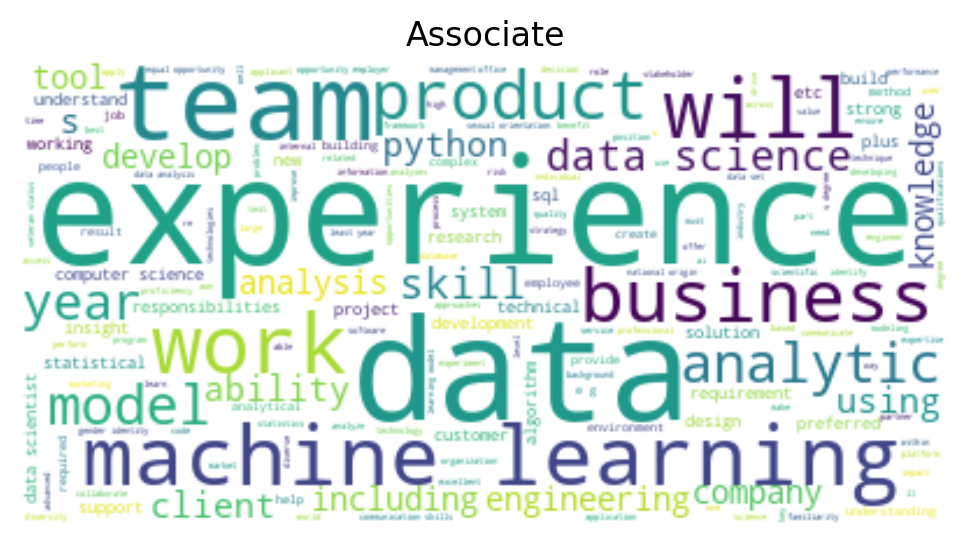

In [33]:
for exp in exp_req:
    plt.figure(dpi=200)
    des = df.desc[df.experienceRequirements==exp]
    wordcloud = WordCloud(background_color="white").generate(' '.join(des))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(exp)
    plt.axis("off")
    plt.show()